In [1]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       haa95532_0         123 KB
    cairo-1.16.0               |       haedb8bc_5         1.9 MB
    certifi-2023.7.22          |  py311haa95532_0         155 KB
    expat-2.5.0                |       hd77b12b_0         225 KB
    font-ttf-dejavu-sans-mono-2.37|       hd3eb1b0_0         335 KB
    font-ttf-inconsolata-2.001 |       hcb22688_0          83 KB
    font-ttf-source-code-pro-2.030|       hd3eb1b0_0         654 KB
    font-ttf-ubuntu-0.83       |       h8b1ccd4_0         1.5 MB
    fontconfig-2.14.1          |       h9c4af85_2         198 KB
    fonts-anaconda-1           |       h8fa9717_0           3 KB
    fonts-conda-ecosystem-1    |       hd3eb1b0_0 



==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0




In [1]:
import pandas as pd
data=pd.read_excel('bupa1.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   345 non-null    int64  
 1   F1      345 non-null    int64  
 2   F2      345 non-null    int64  
 3   F3      345 non-null    int64  
 4   F4      345 non-null    int64  
 5   F5      345 non-null    int64  
 6   F6      345 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [2]:
import numpy as np
Y=data.Class
X_features=list(data.columns)
X_features.remove('Class')
X_features

['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

In [3]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X=data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6']]
X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size = 0.3, random_state = 42 )

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(criterion='gini',max_depth=6)
clf_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=6)

In [5]:
from sklearn import metrics
tree_predict=clf_tree.predict(X_test)
metrics.roc_auc_score(y_test,tree_predict)

0.6568181818181819

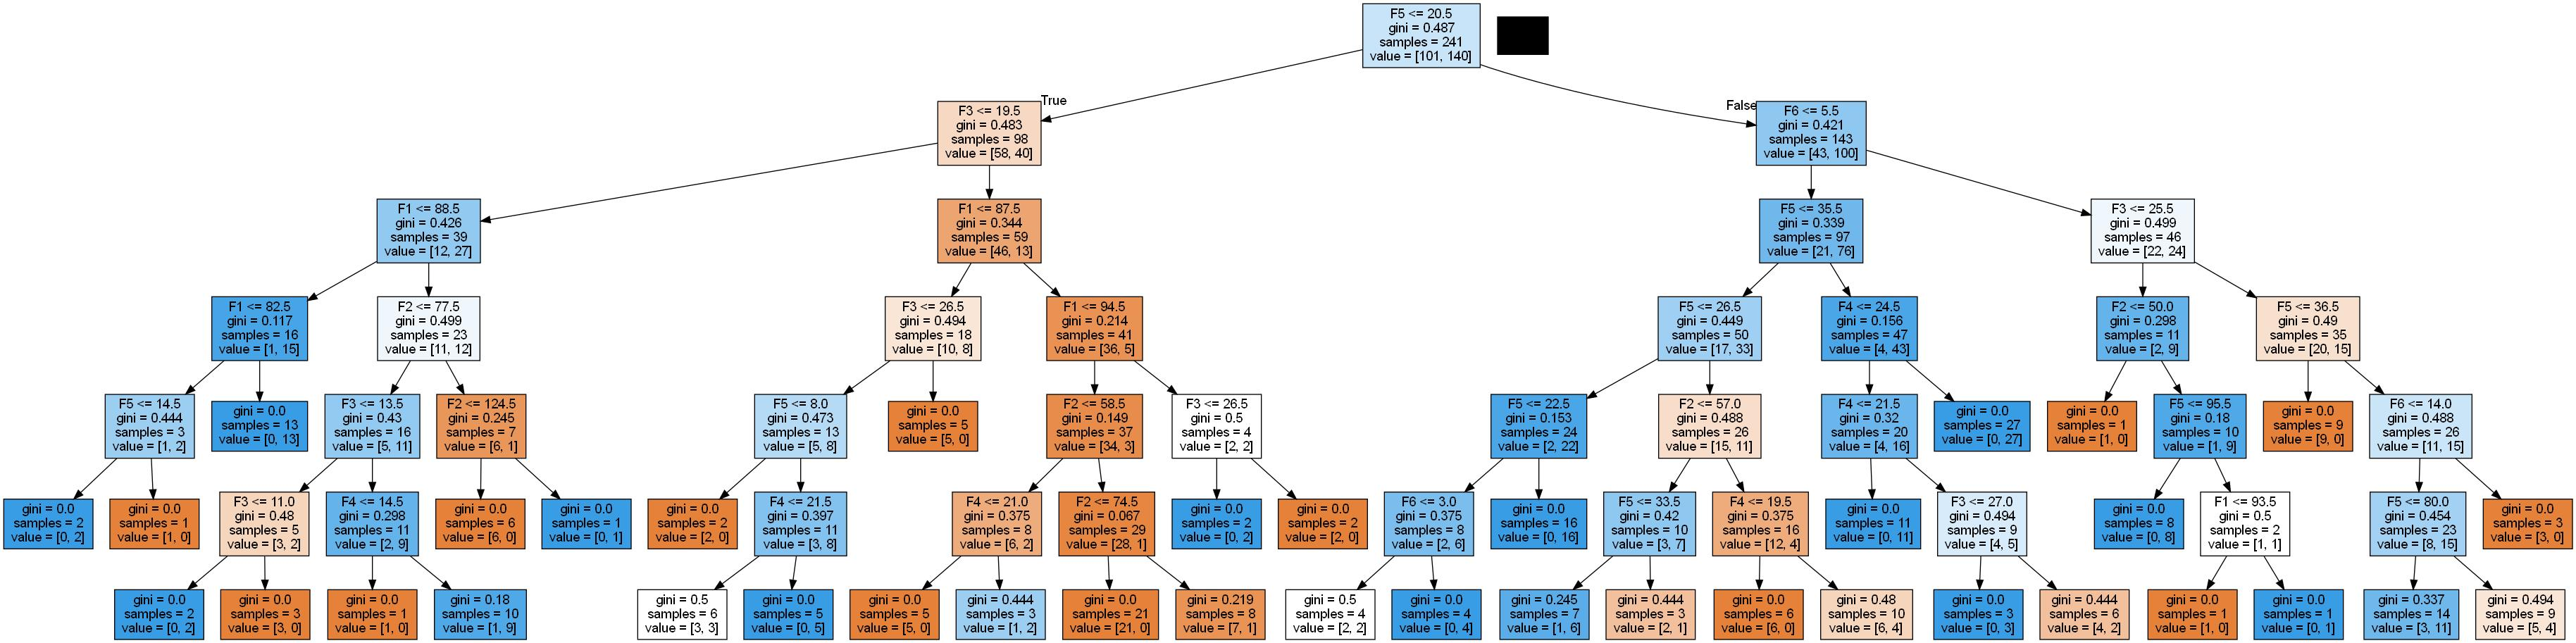

In [6]:
#information gain
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

export_graphviz(clf_tree,out_file="tree.odt",feature_names=X_train.columns,filled=True)
tree_graph=pdot.graphviz.graph_from_dot_file('tree.odt')
tree_graph.write_jpg('tree.png')
Image(filename='tree.png')

In [7]:
gini_node_1 = 1 - pow(200/345, 2) - pow (145/345, 2)
print( round( gini_node_1, 4) )

0.4873


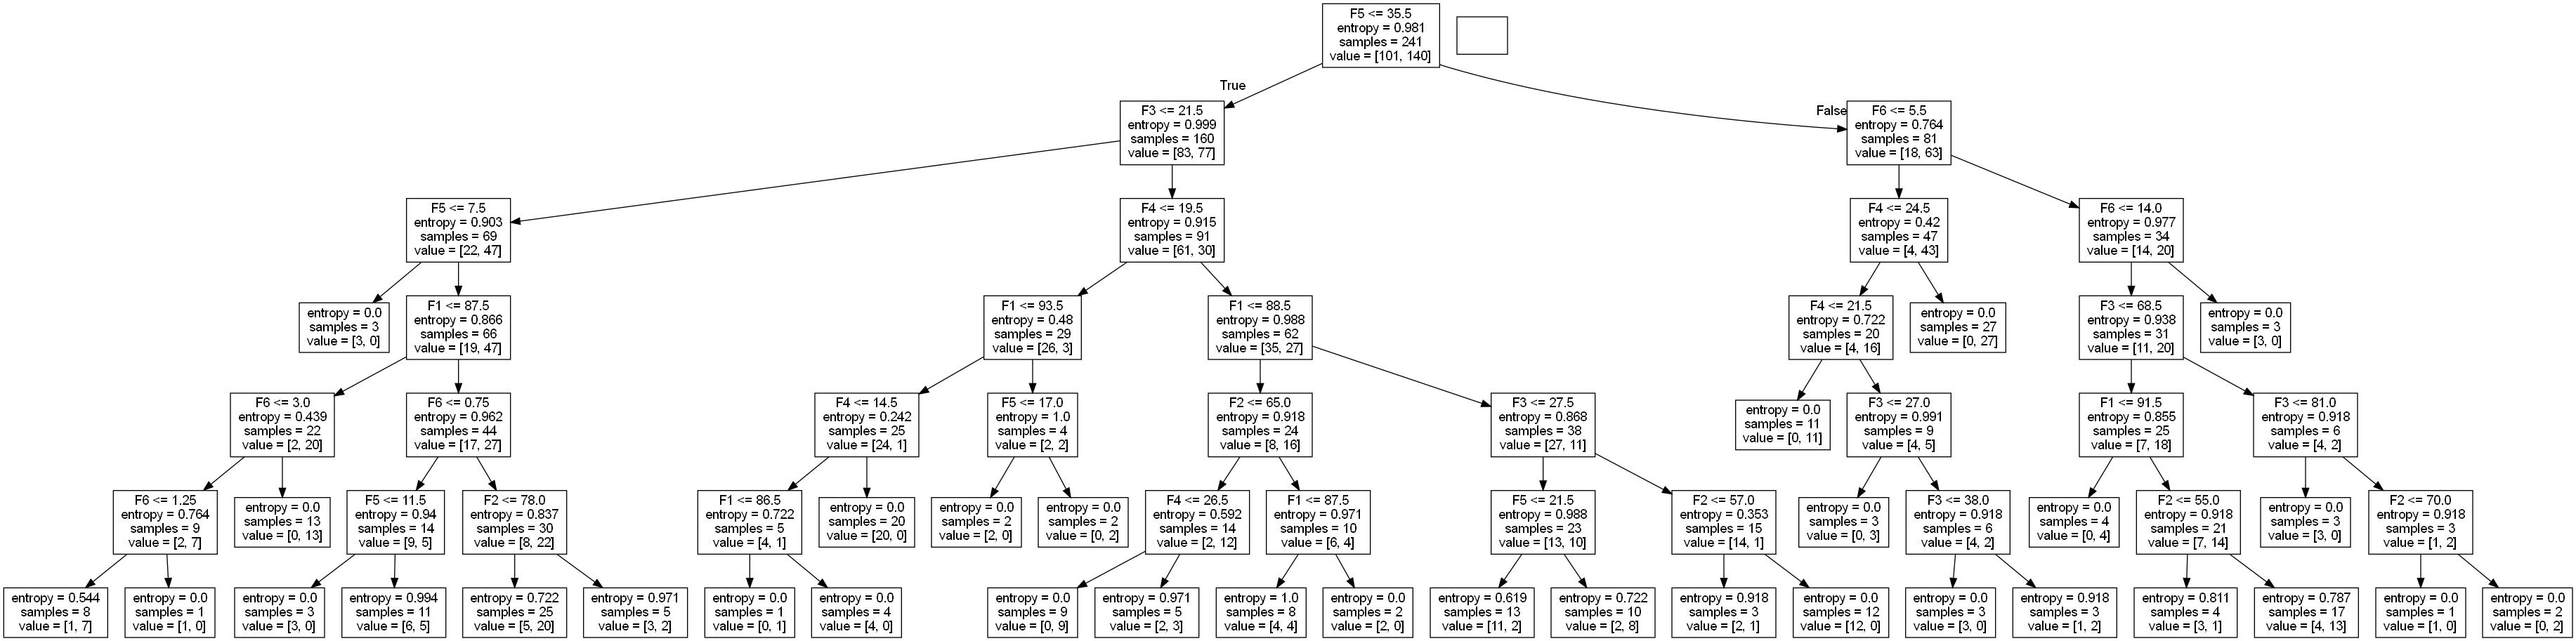

In [8]:
# entropy
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy',max_depth = 6 )
clf_tree_entropy.fit( X_train, y_train )
# Export the tree into odt file
export_graphviz( clf_tree_entropy,
out_file = "tree_entropy.odt",
feature_names = X_train.columns )
# Read the create the image file
tree_graph = pdot.graphviz.graph_from_dot_file( 'tree_entropy.odt' )
tree_graph.write_jpg ( 'tree_entropy.png')
# Render the png file
Image(filename='tree_entropy.png')

In [9]:
import math
entropy_node_1 = - (200/345)*math.log2(200/345) - (145/345)*math.log2(145/345)
print(round( entropy_node_1, 2))

0.98


In [10]:
tree_predict = clf_tree_entropy.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

0.6598484848484849